The Jupyter Notebook is for analysing the data from the simulations and to replicate the figures presented in the main text.
Note: Data does not contain all 500 files from each parameter combination due to which there maybe some minor discrepancies in the figures between the notebook and the paper. However, the patterns reported should still hold. 


Import all dependencies

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import glob
import os
import re


Read in the files and create a dataframe

In [165]:
df = []
p = './general/*/*.txt'
res = glob.glob(p)
names = ["generation", "dyn", "Targets", "Population", "Beta", "rad", "mc", "sc", "alpha","mu", "avg_tw","avgf", "avgen", "avgdis", "avgeff" ]


for csv in res:
    frame = pd.read_csv(csv, sep=',', engine='python', names= names, usecols=range(len(names)))
    frame['filename'] = "f1_"+os.path.basename(csv)
    df.append(frame)
    
df = pd.concat(df, ignore_index = True)
df.head()

,generation,dyn,Targets,Population,Beta,rad,mc,sc,alpha,mu,avg_tw,avgf,avgen,avgdis,avgeff,filename
0,3848,False,1000,50,uniform,1,500,0,0.010,straight,599,-2.489580e+12,6.00,4.836022,1.237075,f1_10selection.txt
1,4209,False,1000,50,uniform,1,500,0,0.010,1.1,624,-1.645945e+02,6.00,5.174089,1.156247,f1_10selection.txt
2,5563,False,1000,50,uniform,1,500,0,0.005,1.1,1536,-2.552110e+02,5.98,6.516863,0.914952,f1_10selection.txt
3,6083,False,1000,50,uniform,1,500,0,0.005,straight,1981,-2.373760e+12,6.00,7.058225,0.847432,f1_10selection.txt
4,6082,False,1000,50,uniform,1,500,0,0.010,2,1073,2.326664e+02,6.00,6.669397,0.897413,f1_10selection.txt


the ouptut have many features that are not needed, so we can filter out some columns 

In [166]:
df = df[['Targets', 'Population', 'Beta', 'alpha', 'mu', 'avgdis', 'avgeff', 'filename']]

df.head()

,Targets,Population,Beta,alpha,mu,avgdis,avgeff,filename
0,1000,50,uniform,0.010,straight,4.836022,1.237075,f1_10selection.txt
1,1000,50,uniform,0.010,1.1,5.174089,1.156247,f1_10selection.txt
2,1000,50,uniform,0.005,1.1,6.516863,0.914952,f1_10selection.txt
3,1000,50,uniform,0.005,straight,7.058225,0.847432,f1_10selection.txt
4,1000,50,uniform,0.010,2,6.669397,0.897413,f1_10selection.txt


normalize search efficiency 

In [167]:
df['search_efficiency'] = df.apply(lambda x: ( (x['avgeff'] / (x['Targets']) * 1000 ) ), axis=1)


fix some formatting issues

In [168]:
df['Levy exponent'] = df.apply(lambda x: str(float(x['mu'])) if (type(x['mu']) != str) else x['mu'], axis=1)
df['Alpha'] = df.apply(lambda x: str(float(x['alpha'])) if (type(x['alpha']) != str)  else x['alpha'], axis=1)

In [169]:
for i, row in df.iterrows():
    if df.loc[i,'mu'] == 1.1 :
        df.at[i,'mu'] = '1.1'
    elif df.loc[i,'mu'] == 2 or df.loc[i,'mu'] == 2.0 or df.loc[i,'mu'] == '2' or df.loc[i,'mu'] == '2.0' :
        df.at[i,'mu'] = '2'
    elif df.loc[i,'mu'] == 3 or df.loc[i,'mu'] == 3.0 or df.loc[i,'mu'] == '3' or df.loc[i,'mu'] == '3.0' :
        df.at[i,'mu'] = '3'

In [170]:
for i, row in df.iterrows():
    if df.loc[i,'Beta'] == 1.1 :
        df.at[i,'Beta'] = '1.1'
    elif df.loc[i,'Beta'] == 2 or df.loc[i,'Beta'] == 2.0 or df.loc[i,'Beta'] == '2' or df.loc[i,'Beta'] == '2.0' :
        df.at[i,'Beta'] = '2'
    elif df.loc[i,'Beta'] == 3 or df.loc[i,'Beta'] == 3.0 or df.loc[i,'Beta'] == '3' or df.loc[i,'Beta'] == '3.0' :
        df.at[i,'Beta'] = '3'

## Figure 2

#### Group search efficiency $\eta$ for $N_A$ = 10 as a function of social selectivity parameter $\alpha$, L\'evy exponent $\mu$, resource density $N_R$, and resource clustering $\beta$. Error bars indicate 95\% confidence intervals.

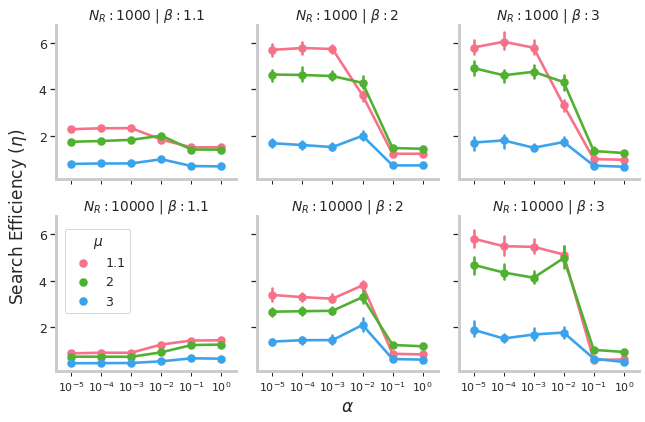

In [171]:
%matplotlib inline
# df2 = dfnodis_all[dfnodis_all['mu'].isin(['1.1', '2', '3', 'uniform'])]
# sns.set(font="Verdana")

sns.set(font_scale=1.15, font="Verdana")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['lines.linewidth'] = 1.45

# paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
# plt.rcParams['axes.prop_cycle'] =  cycler(color=['b'])
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

hue_order = ['1.1', '2', '3']
col_order = ['1.1', '2', '3']

xorder = ['0.0', '0.0001', '0.001', '0.01',  '0.1', '1.0']
# xorder = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]

g = sns.catplot(x="Alpha", order = xorder,
                y="search_efficiency", data=df.loc[(df['Population'] == 10)],col='Beta', hue='mu', ci=95, jitter=True, row='Targets', palette='husl', sharey=True, kind='point', height=3, 
                hue_order = hue_order, col_order=col_order, n_boot=100, legend=False, log=True )
g.set_xticklabels(rotation = (0), fontsize = 11, )

g.set_ylabels('Search Efficiency ' + '(' + (r'$\eta$') + ')', fontsize = 17)
g.set_xlabels(r'$\alpha$', fontsize = 17)
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_xlabel('')
g.axes[1,2].set_xlabel('')
g.axes[1,0].yaxis.labelpad = 20
g.axes[1,0].yaxis.set_label_coords(-0.15,1)

axes = g.axes.flatten()

axes[0].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 1.1$')
axes[1].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 2$')
axes[2].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 3$')
axes[3].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 1.1$')
axes[4].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 2$')
axes[5].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 3$')


plt.legend(title=r'$\mu$', bbox_to_anchor=(-1.75, 1), loc=0, borderaxespad=1)
labels = [r'$10^{-5}$',  r'$10^{-4}$',  r'$10^{-3}$',  r'$10^{-2}$',  r'$10^{-1}$', r'$10^0$']

for i in axes:
    i.set_xticklabels(labels)


# g.savefig('../figures_cf/10agents.png', dpi=500)
# g.savefig('../figures_cf/10agents.svg')




## Figure 3 (a). 

#### Group search efficiency $\eta$ ($N_A$ = 50) as a function of social selectivity parameter ($\alpha$) for different L\'evy exponents ($\mu$), resource density ($N_R$) and resource distribution ($\beta$). Error bars indicate 95\% confidence intervals.

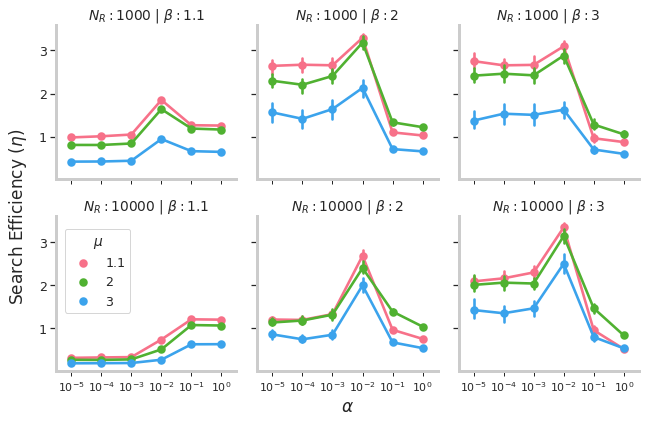

In [172]:
%matplotlib inline
# df2 = dfnodis_all[dfnodis_all['mu'].isin(['1.1', '2', '3', 'uniform'])]
# sns.set(font="Verdana")

sns.set(font_scale=1.15, font="Verdana")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['lines.linewidth'] = 1.45

# paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
# plt.rcParams['axes.prop_cycle'] =  cycler(color=['b'])
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

hue_order = ['1.1', '2', '3']
col_order = ['1.1', '2', '3']

xorder = ['0.0', '0.0001', '0.001', '0.01',  '0.1', '1.0']
# xorder = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]

g = sns.catplot(x="Alpha", order = xorder,
                y="search_efficiency", data=df.loc[(df['Population'] == 50)],col='Beta', hue='mu', ci=95, jitter=True, row='Targets', palette='husl', sharey=True, kind='point', height=3, 
                hue_order = hue_order, col_order=col_order, n_boot=100, legend=False, log=True )
g.set_xticklabels(rotation = (0), fontsize = 11, )

g.set_ylabels('Search Efficiency ' + '(' + (r'$\eta$') + ')', fontsize = 17)
g.set_xlabels(r'$\alpha$', fontsize = 17)
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_xlabel('')
g.axes[1,2].set_xlabel('')
g.axes[1,0].yaxis.labelpad = 20
g.axes[1,0].yaxis.set_label_coords(-0.15,1)

axes = g.axes.flatten()

axes[0].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 1.1$')
axes[1].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 2$')
axes[2].set_title(r'$N_{R}: 1000$' + ' | '  + r'$\beta: 3$')
axes[3].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 1.1$')
axes[4].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 2$')
axes[5].set_title(r'$N_{R}: 10000$' + ' | '  + r'$\beta: 3$')


plt.legend(title=r'$\mu$', bbox_to_anchor=(-1.75, 1), loc=0, borderaxespad=1)
labels = [r'$10^{-5}$',  r'$10^{-4}$',  r'$10^{-3}$',  r'$10^{-2}$',  r'$10^{-1}$', r'$10^0$']

for i in axes:
    i.set_xticklabels(labels)


# g.savefig('../figures_cf/50agents.png', dpi=500)
# g.savefig('../figures_cf/50agents.svg')




To study the effect of group size on relative search efficiencies, we need to form a new dataframe 

In [173]:
dfmeans = df.groupby(['Targets', 'Population', 'Beta', 'mu', 'Alpha']).search_efficiency.agg(['mean','std']).rename(columns={'mean':'search_efficiency'}).reset_index()

In [176]:
dfalpha = []
dft=[]
dfp=[]
dfm =[]
for i in [10,20,30,40,50]:
    for j in [1000,10000]:
        for k in ['1.1', '2', '3'] :
            se_0 = dfmeans.loc[(dfmeans['Targets'] == j) & (dfmeans['Beta'] == '3') & (dfmeans['mu'] == k) & (dfmeans['Population'] == i) & (dfmeans['Alpha'] == '0.0')]['search_efficiency'].values
            print(se_0)
            se_001 = dfmeans.loc[(dfmeans['Targets'] == j) & (dfmeans['Beta'] == '3') & (dfmeans['mu'] == k) & (dfmeans['Population'] == i) & (dfmeans['Alpha'] == '0.01')]['search_efficiency'].values
            print(i, j , se_001)
            dfalpha.append((se_0 / se_001)[0])
            dft.append(j)
            dfp.append(i)
            dfm.append(k)
        
dfalpha = pd.DataFrame({'Targets':dft, 'Population':dfp, 'Eff':dfalpha, 'mu':dfm})

[5.81047667]
10 1000 [3.31689513]
[4.92394715]
10 1000 [4.31706163]
[1.70485715]
10 1000 [1.72902475]
[5.81554806]
10 10000 [5.13062753]
[4.68577826]
10 10000 [4.9782965]
[1.8811875]
10 10000 [1.76222964]
[4.40704884]
20 1000 [4.24780898]
[3.77251757]
20 1000 [4.02655404]
[1.54572384]
20 1000 [1.94839201]
[3.91651905]
20 10000 [4.80336989]
[3.10657178]
20 10000 [4.09408594]
[1.33427935]
20 10000 [2.24885532]
[3.61674014]
30 1000 [3.94142205]
[3.1330996]
30 1000 [3.57317217]
[1.52088294]
30 1000 [1.77960668]
[2.87717154]
30 10000 [4.23013132]
[2.46988233]
30 10000 [3.65272247]
[1.31120592]
30 10000 [2.3372512]
[3.08977374]
40 1000 [3.45542107]
[2.57568538]
40 1000 [3.17454143]
[1.46707719]
40 1000 [1.8248294]
[2.42798565]
40 10000 [3.60841442]
[2.07404237]
40 10000 [3.28850379]
[1.20152026]
40 10000 [2.27177314]
[2.7520154]
50 1000 [3.0956048]
[2.41402987]
50 1000 [2.88039783]
[1.3716752]
50 1000 [1.6235102]
[2.07962822]
50 10000 [3.33336909]
[1.99811727]
50 10000 [3.1314489]
[1.4146383

## Figure 3(b)

#### Effect of group size and individual search strategy on the advantage of minimally-selective social learning strategy ($\alpha = 10^{-5}$) relative to selective social learning ($\alpha = 10^{-2}$) for $\beta = 3$. Dashed line indicates when the advantage of selective and minimally-selective social learning are equivalent.

Text(0.5, 12.200000000000003, '')

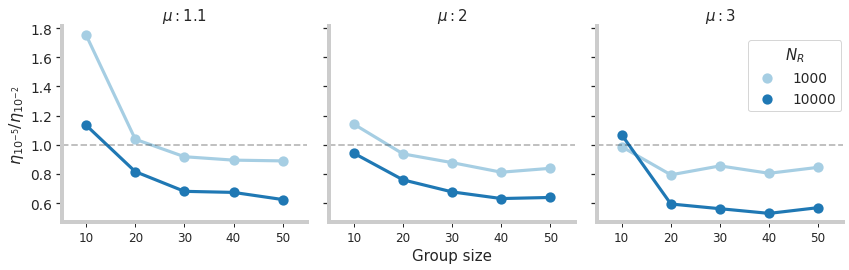

In [177]:
%matplotlib inline
# df2 = dfnodis_all[dfnodis_all['mu'].isin(['1.1', '2', '3', 'uniform'])]
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set(font_scale=1.25, font="Verdana")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['lines.linewidth'] = 1.75

# paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}                  
# plt.rcParams['axes.prop_cycle'] =  cycler(color=['b'])
sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# hue_order = ['1.1', '2', '3']
# col_order = [ '1.1', '2', '3']

# hue_order = ['0.0', '0.005', '0.01', '0.05',  '0.1', '1.0']
g = sns.catplot(x="Population", y="Eff" , data=dfalpha,col='mu', ci=None, jitter=True, hue='Targets', palette='Paired', sharey=True, kind='point', height=4, legend=False )
plt.legend(title=r'$N_{R}$', bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=1)
g.set_ylabels(r'$\eta_{10^{-5}} / \eta_{10^{-2}}$', rotation = 90, fontsize = 16)
# axes = g.axes.flatten()

axes = g.axes.flatten()
# for i in axes:
#     i.set_title("Targets")
axes[0].set_title( r'$\mu: 1.1$')
axes[1].set_title( r'$\mu: 2$')
axes[2].set_title( r'$\mu: 3$')

# g.axes[1,0].set_xlabel('')


for i in axes:
    i.axhline(y=1.0, color='k', alpha=0.3, linestyle='--')
g.set_xticklabels(rotation = (0), fontsize = 12, )
g.set_xlabels('Group size')
g.axes[0,0].set_xlabel('')
g.axes[0,2].set_xlabel('')

# # plt.ylim(0.5, 1.8)
# g.savefig('../figures_cf/group_mu.png', dpi=500)
# g.savefig('../figures_cf/group_mu.svg')

# g.savefig('10agents.png')


# Analysing the observed L\'evy exponents 

read in files that contain that data 

In [205]:
df_levy = []
p = './levy/*levywpp2*/*/*.txt'
res = glob.glob(p)
names = ["generation", "dyn", "Targets", "Population", "Beta", "rad", "mc", "sc", "alpha","mu", "avg_tw","avgf", "avgen", "avgdis", "avgeff", "observed_lw"]

for csv in res:
    frame = pd.read_csv(csv, sep=',', engine='python', names= names, usecols=range(len(names)))
    df_levy.append(frame)
    
df_levy = pd.concat(df_levy, ignore_index = True)
df_levy.head()

,generation,dyn,Targets,Population,Beta,rad,mc,sc,alpha,mu,avg_tw,avgf,avgen,avgdis,avgeff,observed_lw
0,4101,False,10000,10,3,1,500,0,0.00001,1.1,2607,29425.057667,300.0,4.645919,64.538334,2.140569
1,5821,False,10000,10,3,1,500,0,0.00001,2.0,3040,29618.479211,300.1,6.096648,49.423457,2.274075
2,16365,False,10000,10,3,1,500,0,0.00001,3.0,4681,29778.234619,300.0,13.575638,22.100384,2.996822
3,6179,False,10000,10,3,1,500,0,0.00001,2.0,3633,29733.642893,300.0,6.319972,47.565570,2.279784
4,7299,False,10000,10,3,1,500,0,0.00001,1.1,3029,28952.215638,300.1,7.813978,38.796056,1.961775


In [209]:
df_levy['observed_lw'] = df_levy['observed_lw'].astype(float)

df_levy = df_levy[df_levy['observed_lw'] <= 3.5]

## Figure 4(a)

#### Mean estimates of observed L\'evy exponents ($\mu'$) for different L\'evy walks ($\mu$), resource density ($N_R$) and group size ($N_A$) in clustered environments ($\beta = 3$). Dashed line shows the theoretical optimum of $\mu = 2$.

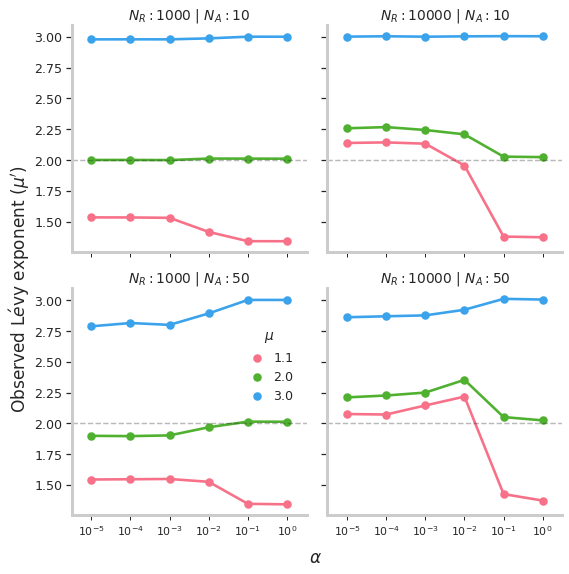

In [211]:
%matplotlib inline


sns.set(font_scale=1.15, font="Verdana")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['lines.linewidth'] = 1.45

sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# xorder = ['0.0', '0.0001', '0.001', '0.005', '0.01', '0.05',  '0.1', '1.0']
xorder = [0, 0.0001, 0.001, 0.01, 0.1, 1.0]

g = sns.catplot(x="alpha",  y="observed_lw", data=df_levy, row='Population', hue='mu', ci=95, jitter=True, col='Targets', palette='husl', sharey=True, kind='point', height=4,  n_boot=100, legend=False, log=True )
g.set_xticklabels(rotation = (0), fontsize = 11, )

g.set_ylabels(r'Observed L$\acute{e}$vy exponent ' + r'($\mu^\prime$)', fontsize = 17)
g.set_xlabels(r'$\alpha$', fontsize = 17)
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_xlabel('')
# g.axes[1,2].set_xlabel('')
g.axes[1,0].yaxis.labelpad = 20
g.axes[1,0].yaxis.set_label_coords(-0.17,1)
g.axes[1,1].xaxis.set_label_coords(-0.05,-0.15)

axes = g.axes.flatten()

axes[0].set_title(r'$N_{R}: 1000$' + ' | '  + r'$N_A: 10$')
axes[2].set_title(r'$N_{R}: 1000$' + ' | '  + r'$N_A: 50$')
axes[1].set_title(r'$N_{R}: 10000$' + ' | '  + r'$N_A: 10$')
axes[3].set_title(r'$N_{R}: 10000$' + ' | '  + r'$N_A: 50$')

# plt.ylim(1.1, 3.2)

plt.legend(title=r'$\mu$', bbox_to_anchor=(-0.07, 0.9), loc=0, borderaxespad=1, frameon=False, handletextpad = 0.3)

for i in axes:
    i.axhline(y=2.0, color='k', alpha=0.3, linestyle='--')
    

labels = [r'$10^{-5}$',  r'$10^{-4}$',  r'$10^{-3}$',  r'$10^{-2}$',  r'$10^{-1}$', r'$10^0$']

for i in axes:
    i.set_xticklabels(labels)


# g.savefig('../figures_cf/emergent_mu.png', dpi=500)
# g.savefig('../figures_cf/emergent_mu.svg')




In [216]:
df_levy['search_efficiency'] = df_levy.apply(lambda x: ( (x['avgeff'] / x['Targets'] * 1000) ), axis=1)


In [220]:
colors = []
from matplotlib import cm

viridis = cm.get_cmap('viridis', 6)

norm = mpl.colors.LogNorm(vmin=0.00001,vmax=1)
for i in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0] :
    colors.append(viridis(norm(i)))
    
    
colors.reverse()

## Figure 4(b)

#### Correlation between search efficiency and the observed L\'evy exponent for all simulations.

[(1.1, 3.5)]

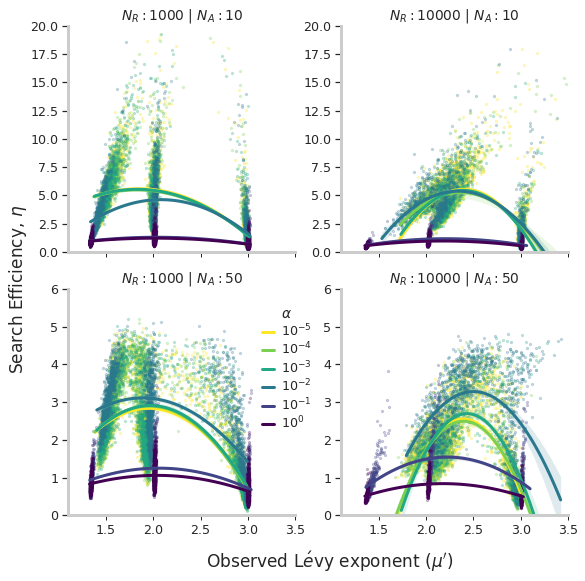

In [222]:
%matplotlib inline

sns.set(font_scale=1.15, font="Verdana")
import matplotlib as mpl
from cycler import cycler
mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['lines.linewidth'] = 1.45


sns.set_style("whitegrid", {'axes.grid' : False})
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True


p = sns.color_palette("viridis_r", n_colors=7)
g = sns.lmplot(y='search_efficiency', x = 'observed_lw', data=df_levy, hue='alpha',  height=4, legend=False, 
               sharey=False, col='Targets', row='Population', 
               truncate=True,palette=colors, n_boot=100, order=2, ci=95, scatter=True, 
               fit_reg=True, scatter_kws={'s':5, 'alpha':0.25}, line_kws={'linewidth':3})


g.set_xlabels(r'Observed L$\acute{e}$vy exponent ' + r'($\mu^\prime$)', fontsize = 17)
g.set_ylabels('Search Efficiency, ' + r'$\eta$', fontsize = 17)
g.axes[0,0].set_ylabel('')
g.axes[1,0].set_xlabel('')
g.axes[1,0].yaxis.labelpad = 20
g.axes[1,0].yaxis.set_label_coords(-0.17,1)
g.axes[1,1].xaxis.set_label_coords(-0.05,-0.15)

axes = g.axes.flatten()

axes[0].set_title(r'$N_{R}: 1000$' + ' | '  + r'$N_A: 10$')
axes[2].set_title(r'$N_{R}: 1000$' + ' | '  + r'$N_A: 50$')
axes[1].set_title(r'$N_{R}: 10000$' + ' | '  + r'$N_A: 10$')
axes[3].set_title(r'$N_{R}: 10000$' + ' | '  + r'$N_A: 50$')

labels = [r'$10^{-5}$',  r'$10^{-4}$',  r'$10^{-3}$',  r'$10^{-2}$',  r'$10^{-1}$', r'$10^0$']

plt.legend(title=r'$\alpha$', bbox_to_anchor=(-0.05, 1),  borderaxespad=1, labels=labels, frameon=False, labelspacing = 0.15, handlelength = 1, handletextpad = 0.5)
axes[0].set(ylim=(0,20 ))
axes[1].set(ylim=(0,20 ))

axes[2].set(ylim=(0,6 ))
axes[3].set(ylim=(0,6 ))

axes[0].set(xlim=(1.1,3.5 ))
axes[1].set(xlim=(1.1,3.5 ))
axes[2].set(xlim=(1.1,3.5 ))
axes[3].set(xlim=(1.1,3.5 ))




# g.savefig('../figures_cf/all_mu_eff_alpha.png', dpi=500)
# g.savefig('../figures_cf/all_mu_eff_alpha.svg')


